In [114]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Ground():
    def __init__(self,
                 cohesion=0.0001040 * 1e6,
                 K=0.001,
                 shear_resistance_angle=20/180.*2*np.pi,
                 mu_t=0.65,
                 g=9.81,
                 fr=0.6,
                 friction_coefficient=0.1):
        self.cohesion = cohesion  # [Pa]
        self.K = K  # [m]
        self.shear_resistance_angle = shear_resistance_angle  # [rad]
        self.mu_t = mu_t
        self.g = g
        self.fr = fr
        self.friction_coefficient = friction_coefficient

In [103]:
class GroundMap:
    def __init__(self, width=4, height=4) -> None:
        self.width = width
        self.height = height

        # Initialize the map with Ground objects
        self.map = [[Ground(friction_coefficient=np.random.random())
                     for _ in range(width)] for _ in range(height)]

        # Calculate the coordinate range
        self.x_min = -width // 2
        self.x_max = width // 2
        self.y_min = -height // 2
        self.y_max = height // 2

        self.i_max = height - 1
        self.j_max = width - 1

    def coords_to_index(self, x, y):

        if not (self.x_min <= x <= self.x_max and self.y_min <= y <= self.y_max):
            raise ValueError("Coordinates are out of bounds.")

        # Convert coordinates to indices
        grid_x = int(np.clip(x - self.x_min, 0, self.width-1))
        grid_y = int(np.clip(self.y_max - y, 0, self.height-1))

        return grid_y, grid_x

    def get_ground(self, x, y):

        grid_y, grid_x = self.coords_to_index(x, y)
        return self.map[grid_y][grid_x]

In [104]:
groundMap = GroundMap()

In [105]:
groundMap.map

[[<__main__.Ground at 0x720a1ec3a610>,

In [106]:
for i in range(4):
    for j in range(4):
        print(i,j,groundMap.map[i][j].friction_coefficient)

0 0 0.10227385134294398
0 1 0.8109064187087269
0 2 0.7677151508646592
0 3 0.325767211451059
1 0 0.7930763928023126
1 1 0.22071101330402887
1 2 0.010426674217277498
1 3 0.3572773799738407
2 0 0.2183459092654726
2 1 0.05210780047997099
2 2 0.2951721265252204
2 3 0.11548431917759816
3 0 0.5378085775081927
3 1 0.47808270539292697
3 2 0.11888051937119126
3 3 0.5305698513138797


In [113]:
friction_coeff_matrix = np.array([[groundMap.map[i][j].friction_coefficient for j in range(4)] for i in range(4)])

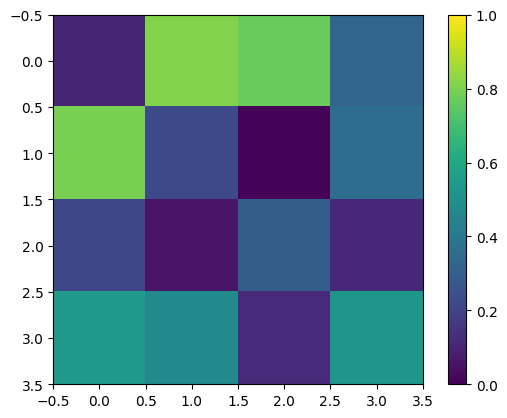

In [120]:
plt.imshow(friction_coeff_matrix, vmin=0, vmax=1)
plt.colorbar()
plt.show()

In [110]:
groundMap.coords_to_index(2, -2)

(3, 3)

In [108]:
groundMap.get_ground(-2,2).friction_coefficient

0.10227385134294398